## Datos para reporte anual de vivienda

El presente notebook se calcularán los datos necesarios para el reporte anual de vivienda. Los datos se obtendrán de la API del Sistema Nacional de Información e Indicadores de Vivienda (SNIIV) de la Secretaría de Desarrollo Agrario, Territorial y Urbano (SEDATU) así como del INEGI.

## Instalar paquetes 


In [5]:
!pip install geopandas
!pip install funciones
!pip install dataframe_image

In [6]:
import pandas as pd
import dataframe_image as dfi
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import locale
import geopandas as gpd
import funciones
import time
from pandas.api.types import CategoricalDtype
from matplotlib import ticker
from PIL import Image, ImageDraw
import calendar
import matplotlib.colors as mcolors

In [7]:
#Evitar notación científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

##  1) Etorno Macroeconómico



#### Indicador Global de la Actividad Económica (IGAE)
- Gráfica 1. Variación anual del Indicador Global de la Actividad Económica (IGAE)

In [8]:
# URL con token del la variación anual del igae
url_igae = "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/737221/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"
url_igaec = "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/737256/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"

# Hacer la solicitud HTTP a la URL
response_indica = requests.get(url_igae)
response_indicac = requests.get(url_igaec)

# Convertir la respuesta en JSON
data_igae = response_indica.json()
data_igaec = response_indicac.json()

In [9]:
# Usar las columnas TIME_PERIOD y OBS_VALUE
df_igae = pd.DataFrame(data_igae["Series"][0]["OBSERVATIONS"])
df_igaec = pd.DataFrame(data_igaec["Series"][0]["OBSERVATIONS"])

In [10]:
#Ver el tipo de variables de los df
df_igae.info()
df_igaec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TIME_PERIOD    362 non-null    object
 1   OBS_VALUE      362 non-null    object
 2   OBS_EXCEPTION  362 non-null    object
 3   OBS_STATUS     362 non-null    object
 4   OBS_SOURCE     362 non-null    object
 5   OBS_NOTE       0 non-null      object
 6   COBER_GEO      362 non-null    object
dtypes: object(7)
memory usage: 19.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TIME_PERIOD    362 non-null    object
 1   OBS_VALUE      362 non-null    object
 2   OBS_EXCEPTION  362 non-null    object
 3   OBS_STATUS     362 non-null    object
 4   OBS_SOURCE     362 non-null    object
 5   OBS_NOTE       0 non-null      object
 6   COBER_GEO      

In [11]:
#Convertir los tipos de datos de caracteres a fecha y numericas
df_igae['TIME_PERIOD'] = pd.to_datetime(df_igae['TIME_PERIOD'])
df_igae['OBS_VALUE'] = pd.to_numeric(df_igae['OBS_VALUE'])

df_igaec['TIME_PERIOD'] = pd.to_datetime(df_igaec['TIME_PERIOD'])
df_igaec['OBS_VALUE'] = pd.to_numeric(df_igaec['OBS_VALUE'])

# Obtener datos de las fechas requeridas 2023-01 a 2023-12
df_igae = df_igae.loc[(df_igae['TIME_PERIOD'] >= '2021-01') & (df_igae['TIME_PERIOD'] < '2023-12')]
df_igaec = df_igaec.loc[(df_igaec['TIME_PERIOD'] >= '2021-01') & (df_igaec['TIME_PERIOD'] < '2023-12')]

# Filtrar las columnas 'TIME_PERIOD' y 'OBS_VALUE' solamente
df_igae = df_igae[['TIME_PERIOD', 'OBS_VALUE']]
df_igaec = df_igaec[['TIME_PERIOD', 'OBS_VALUE']]

C:\Users\hp\AppData\Local\Temp\ipykernel_8380\752146689.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_igae['TIME_PERIOD'] = pd.to_datetime(df_igae['TIME_PERIOD'])
C:\Users\hp\AppData\Local\Temp\ipykernel_8380\752146689.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_igaec['TIME_PERIOD'] = pd.to_datetime(df_igaec['TIME_PERIOD'])


In [14]:
# Renombrar las columnas en los DataFrames
df_igae.rename(columns={'TIME_PERIOD': 'Fecha', 'OBS_VALUE': 'Total'}, inplace=True)
df_igaec.rename(columns={'OBS_VALUE': 'Construccion'}, inplace=True)

# Crear el DataFrame igae con las variables del DataFrame df_igae
igae = df_igae[['Fecha', 'Total']].copy()

# Agregar la variable de construcción desde el DataFrame df_igaec
igae['Construccion'] = df_igaec['Construccion']
igae

,Fecha,Total,Construccion
3,2023-11-01,2.69,19.38
4,2023-10-01,3.49,27.11
5,2023-09-01,3.83,19.73
6,2023-08-01,3.58,29.16
7,2023-07-01,3.67,22.98
8,2023-06-01,4.04,21.16
9,2023-05-01,3.37,16.17
10,2023-04-01,2.79,4.03
11,2023-03-01,2.67,5.05
12,2023-02-01,3.18,3.48


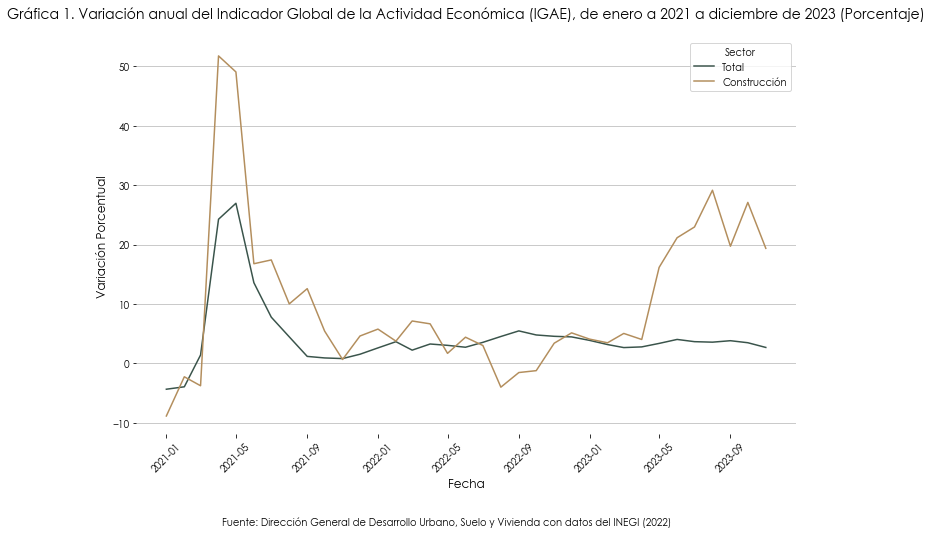

In [74]:
# Fuente de los textos
fuente = "Century Gothic"

# Definición de la figura
fig, ax = plt.subplots(figsize=(10, 7))

# Graficar la variable 'Total'
plt.plot(igae['Fecha'], igae['Total'], color='#3a544b', label='Total')

# Graficar la variable 'Construccion'
plt.plot(igae['Fecha'], igae['Construccion'], color='#b38e5d', label='Construcción')

# Añadir título y etiquetas de ejes
plt.title('Gráfica 1. Variación anual del Indicador Global de la Actividad Económica (IGAE), de enero a 2021 a diciembre de 2023 (Porcentaje)', fontsize=14, loc='center', pad=20, fontname=fuente)
plt.xlabel('Fecha', fontsize=12, fontname=fuente)
plt.ylabel('Variación Porcentual', fontsize=12, fontname=fuente)

# Eliminar marco del gráfico
plt.box(on=None)

# Líneas horizontales en el gráfico
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#bdbdbd')

# Añadir leyenda
plt.legend(title='Sector', fontsize=10)

# Añadir fuente
plt.figtext(0.5, -0.05, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del INEGI (2022)', ha='center', fontsize=10, fontname=fuente)

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, fontname=fuente)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


#### Inversión Fija Bruta (IFB)
- Gráfica 2. Variación anual de la Inversión Fija Bruta (IFB) de la construcción



In [41]:
# URL con token del ifb variación anual desestacionalizada
url_ifb =       "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/741160/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"
url_ifb_resi =  "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/741167/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"
url_ifb_nresi = "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/741174/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"

# Hacer la solicitud HTTP a la URL
response_ifb = requests.get(url_ifb)
response_ifb_resi = requests.get(url_ifb_resi)
response_ifb_nresi = requests.get(url_ifb_nresi)

# Convertir la respuesta en JSON
data_ifb = response_ifb.json()
data_ifb_resi = response_ifb_resi.json()
data_ifb_nresi = response_ifb_nresi.json()

In [42]:
# Crear dataframes de pandas a partir de los datos JSON
df_ifb = pd.DataFrame(data_ifb["Series"][0]["OBSERVATIONS"])
df_ifb_resi = pd.DataFrame(data_ifb_resi["Series"][0]["OBSERVATIONS"])
df_ifb_nresi = pd.DataFrame(data_ifb_nresi["Series"][0]["OBSERVATIONS"])

In [43]:
#Usar las columnas necesarias
df_ifb = df_ifb[['TIME_PERIOD', 'OBS_VALUE']]
df_ifb_resi = df_ifb_resi[['TIME_PERIOD', 'OBS_VALUE']]
df_ifb_nresi = df_ifb_nresi[['TIME_PERIOD', 'OBS_VALUE']]

In [44]:
#Convertir los tipos de datos
df_ifb['TIME_PERIOD'] = pd.to_datetime(df_ifb['TIME_PERIOD'])
df_ifb['OBS_VALUE'] = pd.to_numeric(df_ifb['OBS_VALUE'])

df_ifb_resi['TIME_PERIOD'] = pd.to_datetime(df_ifb_resi['TIME_PERIOD'])
df_ifb_resi['OBS_VALUE'] = pd.to_numeric(df_ifb_resi['OBS_VALUE'])

df_ifb_nresi['TIME_PERIOD'] = pd.to_datetime(df_ifb_nresi['TIME_PERIOD'])
df_ifb_nresi['OBS_VALUE'] = pd.to_numeric(df_ifb_nresi['OBS_VALUE'])

C:\Users\hp\AppData\Local\Temp\ipykernel_8380\172831823.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ifb['TIME_PERIOD'] = pd.to_datetime(df_ifb['TIME_PERIOD'])
C:\Users\hp\AppData\Local\Temp\ipykernel_8380\172831823.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ifb_resi['TIME_PERIOD'] = pd.to_datetime(df_ifb_resi['TIME_PERIOD'])
C:\Users\hp\AppData\Local\Temp\ipykernel_8380\172831823.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ifb_nresi['TIME_PERIOD'] = pd.to_datetime(df_ifb_nresi['TIME_PERIOD'])


In [45]:
#Obtener datos de las fechas requeridas 2023-12-01 a 2023-01-01
df_ifb = df_ifb.loc[(df_ifb['TIME_PERIOD'] >= '2021-01') & (df_ifb ['TIME_PERIOD'] <= '2023-12')]
df_ifb_resi  = df_ifb_resi .loc[(df_ifb_resi['TIME_PERIOD'] >= '2021-01') & (df_ifb_resi ['TIME_PERIOD'] <= '2023-12')]
df_ifb_nresi  = df_ifb_nresi .loc[(df_ifb_nresi['TIME_PERIOD'] >= '2021-01') & (df_ifb_nresi ['TIME_PERIOD'] <= '2023-12')]

In [46]:
# Renombrar las columnas en los DataFrames
df_ifb.rename(columns={'TIME_PERIOD': 'Fecha', 'OBS_VALUE': 'Construcción'}, inplace=True)
df_ifb_resi.rename(columns={'OBS_VALUE': 'Residencial'}, inplace=True)
df_ifb_nresi.rename(columns={'OBS_VALUE': 'No residencial'}, inplace=True)

# Copiar el dataframe df_ifb en el nuevo dataframe ifb
ifb = df_ifb[['Fecha', 'Construcción']].copy()

# Agregar las variables necesarias al nuevo dataframe
ifb['Residencial'] = df_ifb_resi['Residencial'].values
ifb['No residencial'] = df_ifb_nresi['No residencial'].values

ifb

,Fecha,Construcción,Residencial,No residencial
2,2023-12-01,22.13,0.66,40.07
3,2023-11-01,21.58,6.02,35.64
4,2023-10-01,31.22,19.32,42.92
5,2023-09-01,26.20,8.02,41.68
6,2023-08-01,39.40,0.51,77.72
7,2023-07-01,30.03,3.69,54.92
8,2023-06-01,31.53,1.00,57.63
9,2023-05-01,23.10,1.64,47.89
10,2023-04-01,7.72,-9.71,29.70
11,2023-03-01,7.04,-1.46,16.49


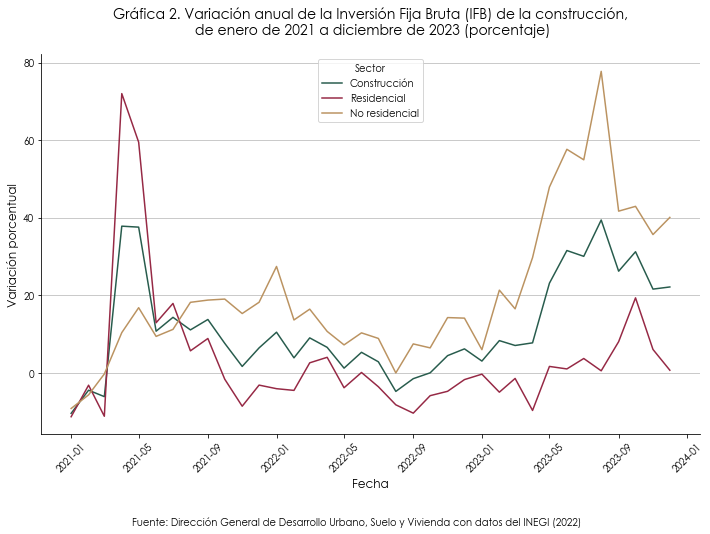

In [68]:
# Fuente de los textos
plt.rcParams['font.family'] = 'Century Gothic'

# Definición de la figura
fig, ax = plt.subplots(figsize=(10, 7))

# Datos del DataFrame ifb
fechas = ifb['Fecha']
construccion = ifb['Construcción']
residencial = ifb['Residencial']
no_residencial = ifb['No residencial']

# Crear la gráfica
plt.plot(fechas, construccion, label='Construcción', color='#285c4d')
plt.plot(fechas, residencial, label='Residencial', color='#962945')
plt.plot(fechas, no_residencial, label='No residencial', color='#bb9361')

# Eliminar marco del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Líneas horizontales en el gráfico
ax.yaxis.grid(True, color='#bdbdbd')

# Título y etiquetas de los ejes
plt.title('Gráfica 2. Variación anual de la Inversión Fija Bruta (IFB) de la construcción,\n de enero de 2021 a diciembre de 2023 (porcentaje)',  fontsize=14, loc='center', pad=20, fontname=fuente)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Variación porcentual', fontsize=12)

# Agregar la fuente al pie de la gráfica
plt.figtext(0.5, -0.05, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del INEGI (2022)', ha='center', fontsize=10)

# Mostrar la leyenda
plt.legend(title='Sector', fontsize=10)

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Líneas horizontales en el gráfico
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#bdbdbd')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


#### Valor de la producción en la construcción
- Gráfica 3. Variación anual real del Valor de la producción de la industria de la construcción, de enero a 2023 a diciembre 2023 (porcentaje)

In [53]:
# URL con token del ifb variación anual desestacionalizada
url_co =  "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/736950/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"
url_ed =  "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/736943/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"

# Hacer la solicitud HTTP a la URL
response_co = requests.get(url_co)
response_ed = requests.get(url_ed)

# Convertir la respuesta en JSON
data_co = response_co.json()
data_ed = response_ed.json()

In [54]:
# Crear dataframes de pandas a partir de los datos JSON
df_co = pd.DataFrame(data_co["Series"][0]["OBSERVATIONS"])
df_ed = pd.DataFrame(data_ed["Series"][0]["OBSERVATIONS"])

In [55]:
#Usar las columnas necesarias
df_co = df_co[['TIME_PERIOD', 'OBS_VALUE']]
df_ed = df_ed[['TIME_PERIOD', 'OBS_VALUE']]

In [56]:
df_co.info()
df_ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TIME_PERIOD  362 non-null    object
 1   OBS_VALUE    362 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TIME_PERIOD  362 non-null    object
 1   OBS_VALUE    362 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB


In [57]:
#Convertir los tipos de datos
df_co['TIME_PERIOD'] = pd.to_datetime(df_co['TIME_PERIOD'])
df_co['OBS_VALUE'] = pd.to_numeric(df_co['OBS_VALUE'])

df_ed['TIME_PERIOD'] = pd.to_datetime(df_ed['TIME_PERIOD'])
df_ed['OBS_VALUE'] = pd.to_numeric(df_ed['OBS_VALUE'])

C:\Users\hp\AppData\Local\Temp\ipykernel_8380\3838330760.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_co['TIME_PERIOD'] = pd.to_datetime(df_co['TIME_PERIOD'])
C:\Users\hp\AppData\Local\Temp\ipykernel_8380\3838330760.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ed['TIME_PERIOD'] = pd.to_datetime(df_ed['TIME_PERIOD'])


In [58]:
#Obtener datos de las fechas requeridas 
df_co = df_co.loc[(df_co['TIME_PERIOD'] >= '2022-01') & (df_co ['TIME_PERIOD'] <= '2023-12')]
df_ed = df_ed.loc[(df_ed['TIME_PERIOD'] >= '2022-01') & (df_ed ['TIME_PERIOD'] <= '2023-12')]

In [59]:
# Renombrar las columnas en los DataFrames
df_co.rename(columns={'TIME_PERIOD': 'Fecha', 'OBS_VALUE': 'Construcción'}, inplace=True)
df_ed.rename(columns={'TIME_PERIOD': 'Fecha', 'OBS_VALUE': 'Edificación'}, inplace=True)

In [60]:
# Añadir la columna de Edificación al DataFrame df_co
df_co['Edificación'] = df_ed['Edificación']
df_co

,Fecha,Construcción,Edificación
2,2023-12-01,7.27,15.31
3,2023-11-01,9.51,19.38
4,2023-10-01,17.40,27.11
5,2023-09-01,11.48,19.73
6,2023-08-01,6.16,29.16
7,2023-07-01,6.68,22.98
8,2023-06-01,6.09,21.16
9,2023-05-01,4.98,16.17
10,2023-04-01,-4.57,4.03
11,2023-03-01,-0.06,5.05


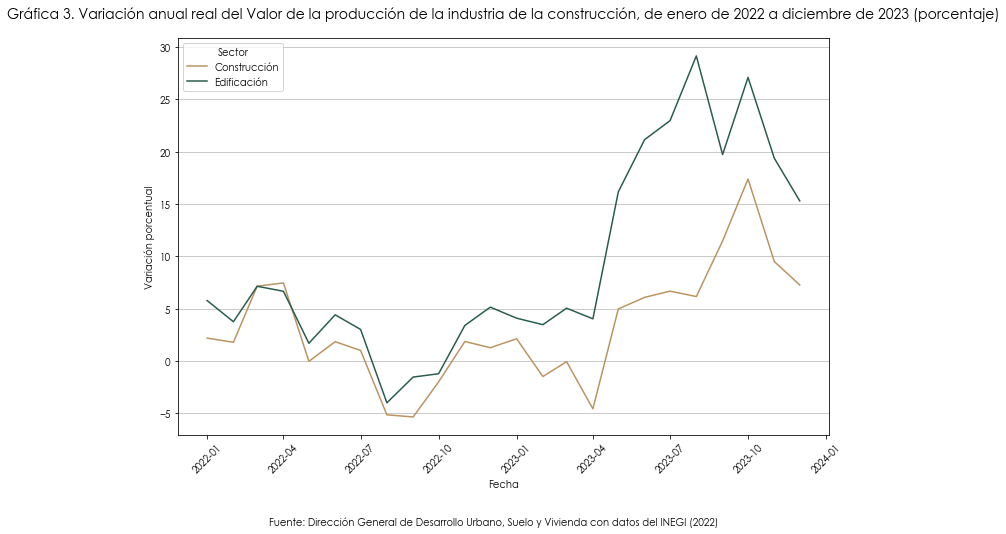

In [71]:
import matplotlib.pyplot as plt

# Fuente de los textos
plt.rcParams['font.family'] = 'Century Gothic'

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 7))

# Graficar los datos
ax.plot(df_co['Fecha'], df_co['Construcción'], color='#bb9361', label='Construcción')
ax.plot(df_co['Fecha'], df_co['Edificación'], color='#285c4d', label='Edificación')

# Configurar título y etiquetas de los ejes
ax.set_title('Gráfica 3. Variación anual real del Valor de la producción de la industria de la construcción, de enero de 2022 a diciembre de 2023 (porcentaje)', fontsize=14, loc='center', pad=20)
ax.set_xlabel('Fecha')
ax.set_ylabel('Variación porcentual')

# Agregar la fuente al pie de la gráfica
plt.figtext(0.5, -0.05, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del INEGI (2022)', ha='center', fontsize=10)

# Mostrar la leyenda
plt.legend(title='Sector', fontsize=10)

# Líneas horizontales en el gráfico
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#bdbdbd')

# Rotar las etiquetas del eje x para mayor legibilidad
ax.tick_params(axis='x', rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


- Gráfica 4. Variación anual de puestos de trabajo a enero 2023 a diciembre 2023 (porcentaje y variación absoluta)

- Gráfica 5. Horas trabajadas del personal ocupado del sector de la construcción 2023

- Gráfica 6. Remuneraciones reales por persona ocupada 2023

## FINANCIAMIENTOS PARA VIVIENDA	

- Gráfica 7. Total de financiamientos para vivienda, por organismo otorgante enero a noviembre 2023, según organismo otorgante (porcentaje de acciones)

In [387]:
#Url
url="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2023/0/0/organismo,modalidad,tipo_credito,destino_credito,anio,mes,sexo,grupo_edad"
r=requests.get(url)
print(r.status_code)

200


In [358]:
df=pd.DataFrame(r.json())
df

,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto
0,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,5,300939.02
1,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,26278.51
2,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,199788.64
3,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,2,512147.18
4,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,55018.64
...,...,...,...,...,...,...,...,...,...
62012,2023,febrero,INVI,Viviendas existentes,Credito individual,En arrendamiento,Urbano,54,81000.00
62013,2023,febrero,INVI,Viviendas existentes,Credito individual,En arrendamiento,Urbano,932,1899000.00
62014,2023,febrero,INVI,Viviendas existentes,Credito individual,En arrendamiento,Urbano,155,341500.00
62015,2023,febrero,INVI,Viviendas existentes,Credito individual,En arrendamiento,Urbano,153,292500.00


In [363]:
print("Destino de crédito: ",df["destino_credito"].unique())
print("Organismo: ",df["organismo"].unique())
print("Meses disponiblñes ",df["mes"].unique())

Destino de crédito:  ['Vivienda nueva' 'Con disponibilidad de terreno' 'Vivienda existente'
 'Mejoramientos' 'Ampliación' 'Pago de pasivos' 'Autoproducción'
 'Adquisición de suelo' 'En arrendamiento' 'Reconstrucción'
 'Regularización de asentamientos' 'Insumos para vivienda' 'Liquidez']
Organismo:  ['FOVISSSTE' 'INFONAVIT' 'CONAVI' 'SHF (FONDEO)' 'INSUS' 'HABITAT MEXICO'
 'BANJERCITO' 'BANCA (CNBV)' 'INVI']
Meses disponiblñes  ['enero' 'febrero' 'marzo' 'abril' 'mayo' 'junio' 'julio' 'agosto'
 'septiembre' 'octubre' 'noviembre' 'diciembre']


In [365]:
#Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
shf=df[df["destino_credito"].isin(["Autoproducción","Ampliación","Reconstrucción","Mejoramientos"])]

#Filtrar solo para shf
shf=shf[shf["organismo"].isin(["SHF (FONDEO)"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
shf=shf[(shf["año"] == 2023) & (shf["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]))]
shf

,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto
35196,2023,enero,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,No distribuido,0,0.00
35197,2023,enero,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,No distribuido,0,1158580.13
35198,2023,enero,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,Urbano,12,0.00
35199,2023,enero,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,Rural,10,0.00
35200,2023,enero,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,Mixto,1,0.00
...,...,...,...,...,...,...,...,...,...
40131,2023,diciembre,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,No distribuido,0,3664593.02
40132,2023,diciembre,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,Urbano,3,0.00
40133,2023,diciembre,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,Urbano,12,0.00
40134,2023,diciembre,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,Urbano,10,0.00


In [366]:
#Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
infonavit=df[df["destino_credito"].isin(["Autoproducción","Ampliación","Reconstrucción","Mejoramientos"])]

#Filtrar solo para infonavit
infonavit=infonavit[infonavit["organismo"].isin(["INFONAVIT"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
infonavit=infonavit[(infonavit["año"] == 2023) & (infonavit["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre"]))]
infonavit

,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto
11673,2023,enero,INFONAVIT,Viviendas nuevas,Cofinanciamientos y subsidios,Autoproducción,Urbano,1,0.00
11674,2023,enero,INFONAVIT,Viviendas nuevas,Cofinanciamientos y subsidios,Autoproducción,Urbano,1,0.00
11675,2023,febrero,INFONAVIT,Viviendas nuevas,Cofinanciamientos y subsidios,Autoproducción,Rural,1,0.00
11676,2023,marzo,INFONAVIT,Viviendas nuevas,Cofinanciamientos y subsidios,Autoproducción,Urbano,1,0.00
11677,2023,abril,INFONAVIT,Viviendas nuevas,Cofinanciamientos y subsidios,Autoproducción,Urbano,1,0.00
...,...,...,...,...,...,...,...,...,...
30332,2023,noviembre,INFONAVIT,Mejoramientos,Cofinanciamientos y subsidios,Mejoramientos,Urbano,1,0.00
30333,2023,noviembre,INFONAVIT,Mejoramientos,Cofinanciamientos y subsidios,Mejoramientos,Mixto,4,0.00
30334,2023,noviembre,INFONAVIT,Mejoramientos,Cofinanciamientos y subsidios,Mejoramientos,Semiurbano,1,0.00
30335,2023,noviembre,INFONAVIT,Mejoramientos,Cofinanciamientos y subsidios,Mejoramientos,Urbano,20,0.00


In [367]:
#Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
habitat_mexico=df[df["destino_credito"].isin(["Autoproducción","Ampliación","Reconstrucción","Mejoramientos"])]

#Filtrar solo para habitat_mexico
habitat_mexico=habitat_mexico[habitat_mexico["organismo"].isin(["HABITAT MEXICO"])]
    
# Filtrar el período de enero de 2023 a diciembre de 2023
habitat_mexico=habitat_mexico[(habitat_mexico["año"] == 2023) & (habitat_mexico["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]))]
habitat_mexico

,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto
40558,2023,agosto,HABITAT MEXICO,Viviendas nuevas,Credito individual,Autoproducción,Semiurbano,20,4467442.60
40559,2023,septiembre,HABITAT MEXICO,Viviendas nuevas,Credito individual,Autoproducción,Rural,1,47000.00
40560,2023,septiembre,HABITAT MEXICO,Viviendas nuevas,Credito individual,Autoproducción,Urbano,1,47000.00
40561,2023,septiembre,HABITAT MEXICO,Viviendas nuevas,Credito individual,Autoproducción,Rural,14,658000.00
40562,2023,septiembre,HABITAT MEXICO,Viviendas nuevas,Credito individual,Autoproducción,Semiurbano,93,3804000.00
...,...,...,...,...,...,...,...,...,...
40635,2023,agosto,HABITAT MEXICO,Mejoramientos,Credito individual,Mejoramientos,Mixto,24,1128000.00
40636,2023,noviembre,HABITAT MEXICO,Mejoramientos,Credito individual,Mejoramientos,Urbano,6,1017000.00
40637,2023,noviembre,HABITAT MEXICO,Mejoramientos,Credito individual,Mejoramientos,Urbano,1,115000.00
40638,2023,diciembre,HABITAT MEXICO,Mejoramientos,Credito individual,Mejoramientos,Urbano,2,460000.00


In [368]:
#Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
fovissste=df[df["destino_credito"].isin(["Autoproducción","Ampliación","Reconstrucción","Mejoramientos"])]

#Filtrar solo para fovissste
fovissste=fovissste[fovissste["organismo"].isin(["FOVISSSTE"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
fovissste=fovissste[(fovissste["año"] == 2023) & (fovissste["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre","diciembre"]))]
fovissste

,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto
8541,2023,enero,FOVISSSTE,Mejoramientos,Credito individual,Mejoramientos,Urbano,1,309376.66
8542,2023,febrero,FOVISSSTE,Mejoramientos,Credito individual,Mejoramientos,Urbano,1,392488.00
8543,2023,febrero,FOVISSSTE,Mejoramientos,Credito individual,Mejoramientos,Urbano,1,353349.97
8544,2023,octubre,FOVISSSTE,Mejoramientos,Credito individual,Mejoramientos,Rural,1,394368.43
8545,2023,octubre,FOVISSSTE,Mejoramientos,Credito individual,Mejoramientos,Semiurbano,2,879464.63
8546,2023,octubre,FOVISSSTE,Mejoramientos,Credito individual,Mejoramientos,Urbano,1,426882.00
8547,2023,noviembre,FOVISSSTE,Mejoramientos,Credito individual,Mejoramientos,Urbano,1,378969.63
8548,2023,diciembre,FOVISSSTE,Mejoramientos,Credito individual,Mejoramientos,Rural,1,300391.05
8549,2023,abril,FOVISSSTE,Mejoramientos,Credito individual,Ampliación,Urbano,1,728606.98
8550,2023,abril,FOVISSSTE,Mejoramientos,Credito individual,Ampliación,Urbano,1,721068.68


In [369]:
#Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
cnbv=df[df["destino_credito"].isin(["Autoproducción","Ampliación","Reconstrucción","Mejoramientos"])]

#Filtrar solo para cnbv
cnbv=cnbv[cnbv["organismo"].isin(["BANCA (CNBV)"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
cnbv=cnbv[(cnbv["año"] == 2023) & (cnbv["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre","diciembre"]))]


,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto
46059,2023,enero,BANCA (CNBV),Viviendas nuevas,Credito individual,Autoproducción,Urbano,1,163804.00
46060,2023,enero,BANCA (CNBV),Viviendas nuevas,Credito individual,Autoproducción,Urbano,1,258576.00
46061,2023,enero,BANCA (CNBV),Viviendas nuevas,Credito individual,Autoproducción,Urbano,1,21776.00
46062,2023,enero,BANCA (CNBV),Viviendas nuevas,Credito individual,Autoproducción,Urbano,1,126662.00
46063,2023,enero,BANCA (CNBV),Viviendas nuevas,Credito individual,Autoproducción,Urbano,1,131726.00
...,...,...,...,...,...,...,...,...,...
57048,2023,diciembre,BANCA (CNBV),Mejoramientos,Credito individual,Mejoramientos,Urbano,2,222225.00
57049,2023,diciembre,BANCA (CNBV),Mejoramientos,Credito individual,Mejoramientos,Semiurbano,1,133108.00
57050,2023,diciembre,BANCA (CNBV),Mejoramientos,Credito individual,Mejoramientos,Urbano,11,10279195.00
57051,2023,diciembre,BANCA (CNBV),Mejoramientos,Credito individual,Mejoramientos,Urbano,1,1200000.00


In [370]:
#Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
banjercito=df[df["destino_credito"].isin(["Autoproducción","Ampliación","Reconstrucción","Mejoramientos"])]

#Filtrar solo para banjercito
banjercito=banjercito[banjercito["organismo"].isin(["BANJERCITO"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
banjercito=banjercito[(banjercito["año"] == 2023) & (banjercito["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre","diciembre"]))]
banjercito

,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto


In [403]:
# Crear un df para pegar los resultados generales
autoprod=pd.concat([shf,infonavit,habitat_mexico,fovissste,cnbv,banjercito])
print("El total de financiamientos de autoproducción es de "+str(autoprod["acciones"].sum())+" financiamientos equivalentes a "+str(autoprod["monto"].sum())+" pesos")
autoprod.groupby(["organismo"]).agg({"acciones":"sum","monto":"sum"}) 

El total de financiamientos de autoproducción es de 193052 financiamientos equivalentes a 11138325225.89 pesos


,acciones,monto
organismo,,
BANCA (CNBV),46155,5728262293.00
FOVISSSTE,18,7534382.68
HABITAT MEXICO,905,51990762.41
INFONAVIT,106857,1082057128.58
SHF (FONDEO),39117,4268480659.22


In [404]:
# Calcular el total general de monto
total_general_monto = autoprod["monto"].sum()
total_general_monto

11138325225.89

In [405]:
# Calcular el total de acciones y montos por organismo
autoprod_total_por_organismo = autoprod.groupby(["organismo"]).agg({"acciones": "sum", "monto": "sum"})

# Calcular el total general de acciones y montos
total_general_acciones = autoprod["acciones"].sum()
total_general_monto = autoprod["monto"].sum()

# Calcular el porcentaje sobre el total general por organismo
autoprod_total_por_organismo["porcentaje_monto"] = autoprod_total_por_organismo["monto"] / total_general_monto * 100

# Imprimir el DataFrame con el total y el porcentaje
print(autoprod_total_por_organismo)
print("\nTotal general de acciones:", total_general_acciones)
print("Total general de monto:", total_general_monto)

                acciones         monto  porcentaje_monto
organismo                                               
BANCA (CNBV)       46155 5728262293.00             51.43
FOVISSSTE             18    7534382.68              0.07
HABITAT MEXICO       905   51990762.41              0.47
INFONAVIT         106857 1082057128.58              9.71
SHF (FONDEO)       39117 4268480659.22             38.32

Total general de acciones: 193052
Total general de monto: 11138325225.89


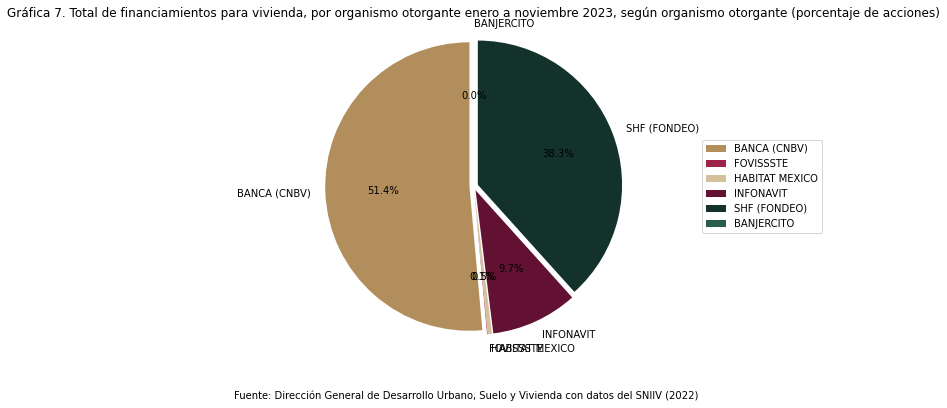

In [407]:
# Definir colores personalizados
colores = ['#b38e5d', '#9d2449', '#d4c19c', '#621132', '#13322b', '#285c4d']

# Crear gráfico de anillo
autoprod_total_por_organismo.loc["BANJERCITO"] = [0, 0, 0]
plt.figure(figsize=(8, 6))

# Destacar cada porción por separado
explode = (0.03, 0.03, 0.03, 0.03, 0.03, 0.03)

plt.pie(autoprod_total_por_organismo["monto"], labels=autoprod_total_por_organismo.index, autopct='%0.1f%%', colors=colores, startangle=90, explode=explode)

# Añadir título
plt.title('Gráfica 7. Total de financiamientos para vivienda, por organismo otorgante enero a noviembre 2023, según organismo otorgante (porcentaje de acciones)', fontsize=12, loc='center')
# Añadir fuente
plt.figtext(0.5, 0.01, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2022)', horizontalalignment='center', fontsize=10)

# Añadir leyenda
plt.legend(autoprod_total_por_organismo.index, loc="center left", bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.axis("equal")
plt.show()

- Gráfica 8. Financiamientos de vivienda, por organismo otorgante y modalidad enero a diciembre a 2023 (porcentaje de acciones)

In [408]:
# Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
shf = df[df["organismo"].isin(["SHF (FONDEO)"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
shf = shf[(shf["año"] == 2023) & (shf["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre"]))]

# Calcular el total de acciones
total_acciones = shf["acciones"].sum()

# Calcular el porcentaje de destino_credito según el número de acciones
porcentaje_destino_credito = shf.groupby("destino_credito")["acciones"].sum() / total_acciones * 100
porcentaje_destino_credito 


destino_credito
Mejoramientos   100.00
Name: acciones, dtype: float64

In [409]:
# Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
infonavit = df[df["organismo"].isin(["INFONAVIT"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
infonavit = infonavit[(infonavit["año"] == 2023) & (infonavit["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]))]

# Calcular el total de acciones
total_acciones = infonavit["acciones"].sum()

# Calcular el porcentaje de destino_credito según el número de acciones
porcentaje_destino_credito = infonavit.groupby("destino_credito")["acciones"].sum() / total_acciones * 100
porcentaje_destino_credito 


destino_credito
Adquisición de suelo             0.74
Autoproducción                   0.19
Con disponibilidad de terreno    2.24
Mejoramientos                   27.76
Pago de pasivos                  0.11
Vivienda existente              33.21
Vivienda nueva                  35.75
Name: acciones, dtype: float64

In [410]:
# Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
habitat_mexico = df[df["organismo"].isin(["HABITAT MEXICO"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
habitat_mexico = habitat_mexico[(habitat_mexico["año"] == 2023) & (habitat_mexico["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]))]

# Calcular el total de acciones
total_acciones = habitat_mexico["acciones"].sum()

# Calcular el porcentaje de destino_credito según el número de acciones
porcentaje_destino_credito = habitat_mexico.groupby("destino_credito")["acciones"].sum() / total_acciones * 100
porcentaje_destino_credito 

destino_credito
Autoproducción          60.99
Insumos para vivienda    0.00
Mejoramientos           39.01
Name: acciones, dtype: float64

In [411]:
# Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
fovissste = df[df["organismo"].isin(["FOVISSSTE"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
fovissste = fovissste[(fovissste["año"] == 2023) & (fovissste["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]))]

# Calcular el total de acciones
total_acciones = fovissste["acciones"].sum()

# Calcular el porcentaje de destino_credito según el número de acciones
porcentaje_destino_credito = fovissste.groupby("destino_credito")["acciones"].sum() / total_acciones * 100
porcentaje_destino_credito 

destino_credito
Ampliación                       0.02
Con disponibilidad de terreno    0.87
Mejoramientos                    0.02
Pago de pasivos                  0.10
Vivienda existente              52.73
Vivienda nueva                  46.24
Name: acciones, dtype: float64

In [412]:
# Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
cnbv = df[df["organismo"].isin(["BANCA (CNBV)"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
cnbv = cnbv[(cnbv["año"] == 2023) & (cnbv["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]))]

# Calcular el total de acciones
total_acciones = cnbv["acciones"].sum()

# Calcular el porcentaje de destino_credito según el número de acciones
porcentaje_destino_credito = cnbv.groupby("destino_credito")["acciones"].sum() / total_acciones * 100
porcentaje_destino_credito 

destino_credito
Adquisición de suelo             1.73
Autoproducción                   0.35
Con disponibilidad de terreno    1.82
Liquidez                         4.04
Mejoramientos                   26.71
Pago de pasivos                  3.76
Vivienda existente              17.92
Vivienda nueva                  43.66
Name: acciones, dtype: float64

In [413]:
# Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
banjercito = df[df["organismo"].isin(["BANJERCITO"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
banjercito = banjercito[(banjercito["año"] == 2023) & (banjercito["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]))]

# Calcular el total de acciones
total_acciones = banjercito["acciones"].sum()

# Calcular el porcentaje de destino_credito según el número de acciones
porcentaje_destino_credito = banjercito.groupby("destino_credito")["acciones"].sum() / total_acciones * 100
porcentaje_destino_credito 

destino_credito
Con disponibilidad de terreno    2.68
Liquidez                         4.29
Vivienda existente              61.96
Vivienda nueva                  31.07
Name: acciones, dtype: float64

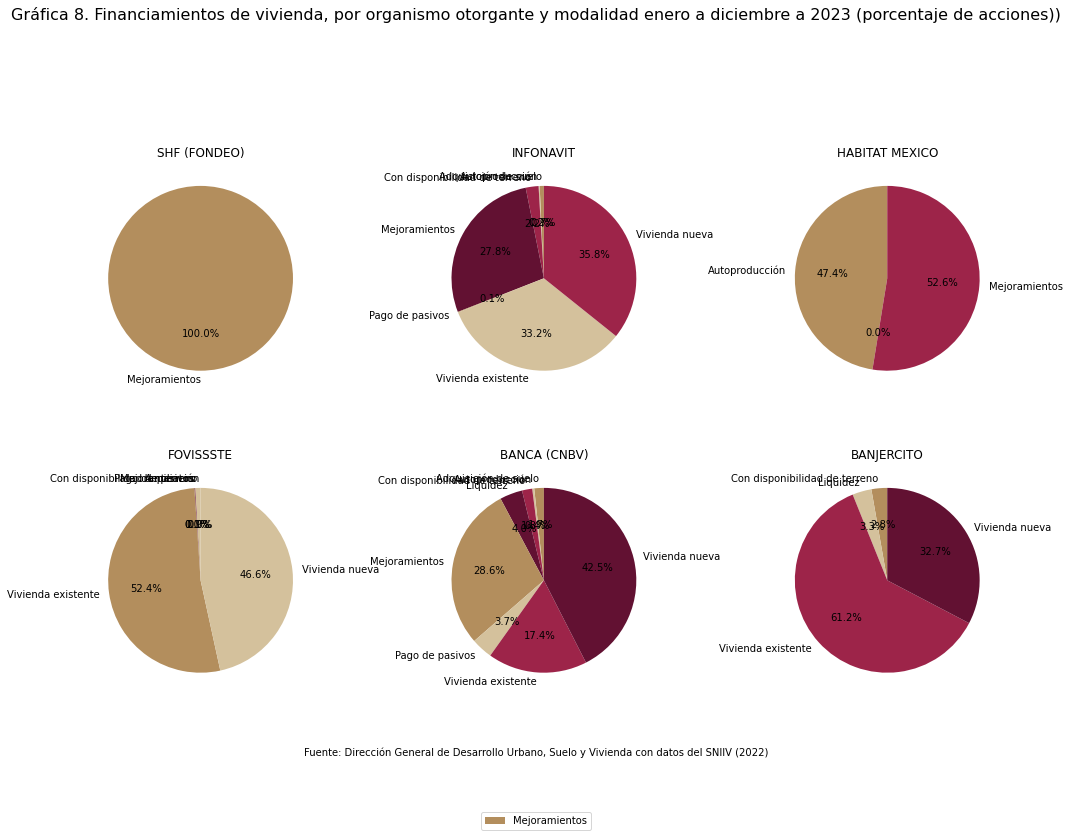

In [416]:
# Colores personalizados
colores = ['#b38e5d', '#d4c19c', '#9d2449', '#621132']

# Crear DataFrames con los porcentajes para cada organismo y destino de crédito
organismos = ["SHF (FONDEO)", "INFONAVIT", "HABITAT MEXICO", "FOVISSSTE", "BANCA (CNBV)", "BANJERCITO"]
dataframes = {}

for organismo in organismos:
    df_organismo = df[df["organismo"] == organismo]
    df_organismo = df_organismo[(df_organismo["año"] == 2023) & (df_organismo["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre"]))]
    total_acciones = df_organismo["acciones"].sum()
    porcentaje_destino_credito = df_organismo.groupby("destino_credito")["acciones"].sum() / total_acciones * 100
    dataframes[organismo] = porcentaje_destino_credito

# Crear gráficos de pastel en una sola imagen
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Gráfica 8. Financiamientos de vivienda, por organismo otorgante y modalidad enero a diciembre a 2023 (porcentaje de acciones))', fontsize=16, y=1.05)
fig.tight_layout(pad=5.0)

legend_labels = None

# Crear gráficos y leyenda para los organimos con sus colores correspondientes
for idx, (organismo, porcentajes) in enumerate(dataframes.items()):
    ax = axs[idx // 3][idx % 3]
    porcentajes.plot(kind="pie", ax=ax, autopct='%1.1f%%', startangle=90, colors=colores, legend=False)
    ax.set_title(organismo)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    
    if idx == 0:
        legend_labels = porcentajes.index

# Añadir leyenda para los tipos de modalidades de crédito
fig.legend(legend_labels, loc='lower center', ncol=len(legend_labels), fontsize=10, bbox_to_anchor=(0.5, -0.1))

# Añadir fuente
plt.figtext(0.5, 0.01, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2022)', horizontalalignment='center', fontsize=10)

plt.show()

- Gráfica 9. Financiamientos promedio para vivienda, por organismo otorgante enero a diciembre a 2023, según organismo otorgante

In [552]:
# Obtener los datos del INPC desde la API del INEGI
url_inegi = "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/628194/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf/?type=json"
response = requests.get(url_inegi)
inpc_data = response.json()

# Crear DataFrame con los datos
inpc = pd.DataFrame(inpc_data["Series"][0]["OBSERVATIONS"])

# Convertir tipos de datos a fecha y numéricos
inpc['TIME_PERIOD'] = pd.to_datetime(inpc['TIME_PERIOD'], format='%Y/%m')

# Obtener datos de las fechas requeridas (2023-01 a 2023-12)
inpc = inpc.loc[(inpc['TIME_PERIOD'] >= '2023-01') & (inpc['TIME_PERIOD'] <= '2023-12')]

# Filtrar las columnas 'TIME_PERIOD' y 'OBS_VALUE' solamente
inpc = inpc[['TIME_PERIOD', 'OBS_VALUE']]

# Renombrar las columnas en los DataFrames
inpc.rename(columns={'TIME_PERIOD': 'Fecha', 'OBS_VALUE': 'Inpc'}, inplace=True)

# Ordenar por fecha
inpc.sort_values(by='Fecha', inplace=True)

# Reiniciar el índice después de la clasificación
inpc.reset_index(drop=True, inplace=True)
inpc


,Fecha,Inpc
0,2023-01-01,127.336
1,2023-02-01,128.046
2,2023-03-01,128.389
3,2023-04-01,128.363
4,2023-05-01,128.084
5,2023-06-01,128.214
6,2023-07-01,128.832
7,2023-08-01,129.545
8,2023-09-01,130.12
9,2023-10-01,130.609


In [522]:
# Crear un DataFrame para pegar los resultados generales
autoprod = pd.concat([shf, infonavit, habitat_mexico, fovissste, cnbv, banjercito])

# Calcular el total de financiamientos de autoproducción por mes
total_por_mes = autoprod.groupby(["mes", "organismo"]).agg({"acciones": "sum", "monto": "sum"}).reset_index()

# Ordenar los meses cronológicamente
total_por_mes['mes'] = pd.to_datetime(total_por_mes['mes'], format='%B').dt.month
total_por_mes = total_por_mes.sort_values('mes')

# Pivote del DataFrame total_por_mes
montos = total_por_mes.pivot(index='mes', columns='organismo', values='monto')

# Rellenar valores NaN con ceros si es necesario
montos.fillna(0, inplace=True)
montos

organismo,BANCA (CNBV),BANJERCITO,FOVISSSTE,HABITAT MEXICO,INFONAVIT,SHF (FONDEO)
mes,,,,,,
1,17914199252.00,28070470.72,1379970702.19,0.00,9021090294.95,75127208.54
2,21274649771.00,39631201.40,1552911844.78,0.00,12212962246.83,88510204.38
3,25248950677.00,52384251.09,2254489478.42,0.00,16841116231.11,196885643.65
4,20192234928.00,42749693.60,2067337928.07,5308000.00,12704661985.32,200342382.62
5,24218667179.00,55397438.84,2512870143.54,3016000.00,16291306566.54,201862862.62
6,26282607674.00,65756910.24,2652378035.03,1475000.00,18740856252.94,207210435.05
7,23156809356.00,79942288.67,2941022385.75,6220723.65,15998139345.67,293270790.67
8,23720147488.00,66288082.94,3324185898.72,7363778.58,19284027487.95,361446317.67
9,22155087985.00,59519421.54,2481472513.95,6662000.00,18776627235.80,411647692.10


In [523]:
# Pivote del DataFrame total_por_mes
acciones = total_por_mes.pivot(index='mes', columns='organismo', values='acciones')

# Rellenar valores NaN con ceros si es necesario
acciones.fillna(0, inplace=True)
acciones

organismo,BANCA (CNBV),BANJERCITO,FOVISSSTE,HABITAT MEXICO,INFONAVIT,SHF (FONDEO)
mes,,,,,,
1,12840.00,20.00,1728.00,0.00,20239.00,3626.00
2,13270.00,35.00,2087.00,0.00,23023.00,3971.00
3,17338.00,40.00,2958.00,0.00,33531.00,1462.00
4,16109.00,32.00,2619.00,105.00,26090.00,258.00
5,19380.00,38.00,3258.00,58.00,35329.00,110.00
6,20659.00,47.00,3394.00,39.00,40006.00,304.00
7,15981.00,66.00,3098.00,62.00,32318.00,3675.00
8,11648.00,58.00,3512.00,78.00,38795.00,3062.00
9,10256.00,50.00,3001.00,168.00,42325.00,2089.00


In [39]:
montos = montos.reset_index().set_index('Organismo')  # Restablecer el índice y establecer la columna 'Organismo' como el nuevo índice en montos




NameError: name 'montos' is not defined

- Gráfica 11. Financiamientos de vivienda según sexo y organismo otorgante 2023 (porcentaje de acciones)

In [466]:
# Obtención de los datos por sexo y rangos de edad de financiamientos de vivienda
url1="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2023,2023/0/0/organismo,genero,rango_edad,anio,mes"
r=requests.get(url1)
print(r.status_code)

200


In [467]:
#Crear dataframe 
df1=pd.DataFrame(r.json())

# Filtrar el DataFrame para excluir 'No disponible' en 'grupo_edad'
df_nd = df1[df1['grupo_edad'] != 'No disponible']
df_nd

,año,mes,organismo,sexo,grupo_edad,acciones,monto
1,2023,enero,FOVISSSTE,Hombre,29 o menos,87,67409665.15
2,2023,febrero,FOVISSSTE,Hombre,29 o menos,122,94277688.96
3,2023,marzo,FOVISSSTE,Hombre,29 o menos,146,106917046.01
4,2023,abril,FOVISSSTE,Hombre,29 o menos,152,116140306.58
5,2023,mayo,FOVISSSTE,Hombre,29 o menos,183,142524265.90
...,...,...,...,...,...,...,...
493,2023,febrero,INVI,Mujer,29 o menos,259,692500.00
494,2023,enero,INVI,Mujer,30 a 59,775,1740750.00
495,2023,febrero,INVI,Mujer,30 a 59,1535,3461000.00
496,2023,enero,INVI,Mujer,60 o más,180,348000.00


In [468]:
# Calcular el total de financiamientos por grupo de edad y sexo (excluyendo 'No disponible')
total_financiamientos = df_nd.groupby(['grupo_edad', 'sexo','organismo'])['acciones'].sum()

# Reorganizar los datos para tener grupos de edad como barras y separados por sexo
total_financiamientos = total_financiamientos.unstack()
total_financiamientos

organismo          BANCA (CNBV)  BANJERCITO  ...    INVI  SHF (FONDEO)
grupo_edad sexo                              ...                      
29 o menos Hombre      13271.00         NaN  ...  220.00      12456.00
           Mujer        7823.00       24.00  ...  391.00      20204.00
30 a 59    Hombre      83614.00         NaN  ... 1235.00       2706.00
           Mujer       53817.00      461.00  ... 2310.00       3078.00
60 o más   Hombre       7019.00         NaN  ...  308.00        323.00
           Mujer        5062.00       75.00  ...  534.00        350.00

[6 rows x 9 columns]

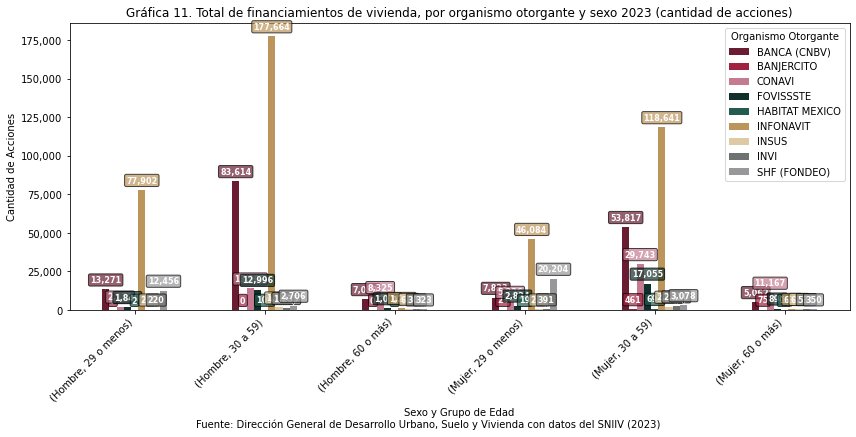

In [469]:
# Definir la paleta de colores personalizada
colores = ['#691c32', '#9f2241', '#c47b91', '#10312b', '#235b4e', '#bc955c', '#ddc9a3', '#6f7271', '#98989a']

# Reorganizar los datos para dividir primero por sexo y luego por grupo de edad
total_financiamientos = total_financiamientos.swaplevel().sort_index()

# Graficar los datos con la paleta de colores personalizada
fig, ax = plt.subplots(figsize=(12, 6))
total_financiamientos.plot(kind='bar', ax=ax, color=colores)

plt.xlabel('Sexo y Grupo de Edad')
plt.ylabel('Cantidad de Acciones')
plt.title('Gráfica 11. Total de financiamientos de vivienda, por organismo otorgante y sexo 2023 (cantidad de acciones)')
plt.figtext(0.5, 0.0, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)', horizontalalignment='center', fontsize=10)
plt.legend(title='Organismo Otorgante')
plt.xticks(rotation=45, ha='right')

# Formatear ejes y agregar cantidades en cada barra
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate('{:,.0f}'.format(y),
                (x, y),
                ha='center',
                va='bottom',
                fontsize=8,
                color='white',
                weight='bold',
                xytext=(0, 5),
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.2', fc=p.get_facecolor(), alpha=0.7),
                arrowprops=dict(arrowstyle='->', color='white', lw=0.5))

plt.tight_layout()
plt.show()

- Gráfica 12. Total de acciones para vivienda por sexo y rango de ingresos, 2023  (cantidad de acciones)	 

In [470]:
# Calcular los porcentajes en función de las filas
total_financiamientos_porcentaje = total_financiamientos.div(total_financiamientos.sum(axis=1), axis=0) * 100
total_financiamientos_porcentaje

organismo          BANCA (CNBV)  BANJERCITO  CONAVI  ...  INSUS  INVI  SHF (FONDEO)
sexo   grupo_edad                                    ...                           
Hombre 29 o menos         12.27         NaN    2.01  ...   0.24  0.20         11.52
       30 a 59            28.46         NaN    4.73  ...   0.53  0.42          0.92
       60 o más           37.07         NaN   43.97  ...   3.22  1.63          1.71
Mujer  29 o menos          9.44        0.03    6.31  ...   0.33  0.47         24.38
       30 a 59            23.62        0.20   13.05  ...   0.90  1.01          1.35
       60 o más           26.15        0.39   57.69  ...   3.21  2.76          1.81

[6 rows x 9 columns]

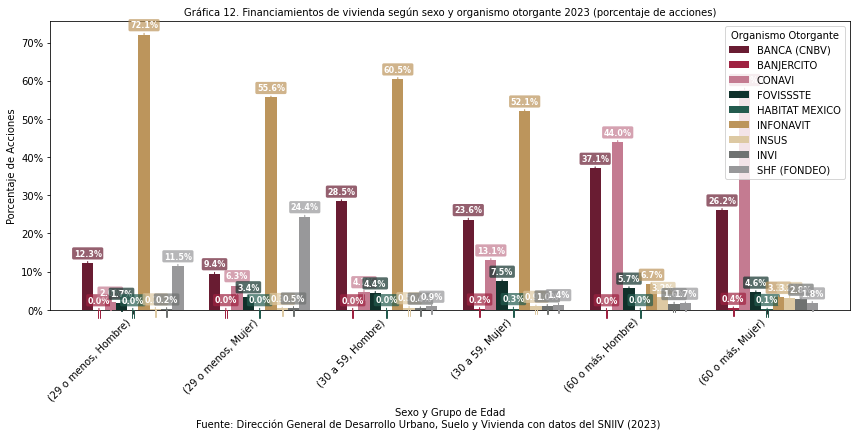

In [471]:
# Definir la paleta de colores personalizada
colores = ['#691c32', '#9f2241', '#c47b91', '#10312b', '#235b4e', '#bc955c', '#ddc9a3', '#6f7271', '#98989a']

# Reorganizar los datos para dividir primero por sexo y luego por grupo de edad
total_financiamientos_porcentaje = total_financiamientos_porcentaje.swaplevel().sort_index()

# Graficar los datos con la paleta de colores personalizada
fig, ax = plt.subplots(figsize=(12, 6))
total_financiamientos_porcentaje.plot(kind='bar', ax=ax, color=colores, width=0.8)

plt.xlabel('Sexo y Grupo de Edad')
plt.ylabel('Porcentaje de Acciones')
plt.title('Gráfica 12. Financiamientos de vivienda según sexo y organismo otorgante 2023 (porcentaje de acciones)', horizontalalignment='center', fontsize=10)
plt.figtext(0.5, 0.002, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)', horizontalalignment='center', fontsize=10)
plt.legend(title='Organismo Otorgante')
plt.xticks(rotation=45, ha='right')

# Formatear ejes
ax.yaxis.set_major_formatter(ticker.PercentFormatter())

# Mostrar los porcentajes en cuadritos encima de las barras
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate('{:.1f}%'.format(y),
                (x, y),
                ha='center',
                va='bottom',
                fontsize=8,
                color='white',
                weight='bold',
                xytext=(0, 5),
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.2', fc=p.get_facecolor(), ec='none', alpha=0.7),
                arrowprops=dict(arrowstyle='-[, widthB={}, lengthB=1'.format(p.get_width()), lw=1, color=p.get_facecolor()))

plt.tight_layout()
plt.show()



- Gráfica 13. Total de financiamientos de vivienda otorgado por rango de edad y sexo 2023 (cantidad de acciones)

In [473]:
# Obtención de los datos por sexo y rangos de edad de financiamientos de vivienda
url2="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2023,2023/0/0/organismo,genero,rango_salarial,anio,mes"
r=requests.get(url2)
print(r.status_code)

200


In [474]:
df2=pd.DataFrame(r.json())
df2

,año,mes,organismo,sexo,rango_salarial,acciones,monto
0,2023,enero,FOVISSSTE,Hombre,2.6 o menos,45,20309748.77
1,2023,febrero,FOVISSSTE,Hombre,2.6 o menos,39,16878390.94
2,2023,marzo,FOVISSSTE,Hombre,2.6 o menos,75,34906382.61
3,2023,abril,FOVISSSTE,Hombre,2.6 o menos,72,34532753.32
4,2023,mayo,FOVISSSTE,Hombre,2.6 o menos,84,66104869.17
...,...,...,...,...,...,...,...
625,2023,diciembre,BANCA (CNBV),Mujer,Más de 12,1879,5197468895.00
626,2023,enero,INVI,Hombre,No disponible,589,1329750.00
627,2023,febrero,INVI,Hombre,No disponible,1174,2651000.00
628,2023,enero,INVI,Mujer,No disponible,1087,2438750.00


In [475]:
# Ver los rangos salariales: 
print("Rangos Salariales: ",df2["rango_salarial"].unique())   

Rangos Salariales:  ['2.6 o menos' '2.61 a 4.00' '4.01 a 6.00' '6.01 a 9.00' '9.01 a 12.00'
 'Más de 12' 'No disponible']


In [476]:
# Filtrar el DataFrame para excluir 'No disponible' en 'rango_salarial'
df_nd = df2[(df2['rango_salarial'] != 'No disponible') & (df2['sexo'] != 'No disponible')]

total_financiamientos = df_nd.groupby(['rango_salarial', 'sexo'])['acciones'].sum()
total_financiamientos

rango_salarial  sexo  
2.6 o menos     Hombre    64576
                Mujer     56558
2.61 a 4.00     Hombre    75813
                Mujer     71807
4.01 a 6.00     Hombre    75167
                Mujer     47882
6.01 a 9.00     Hombre    58501
                Mujer     30981
9.01 a 12.00    Hombre    30832
                Mujer     16501
Más de 12       Hombre    72927
                Mujer     33105
Name: acciones, dtype: int64

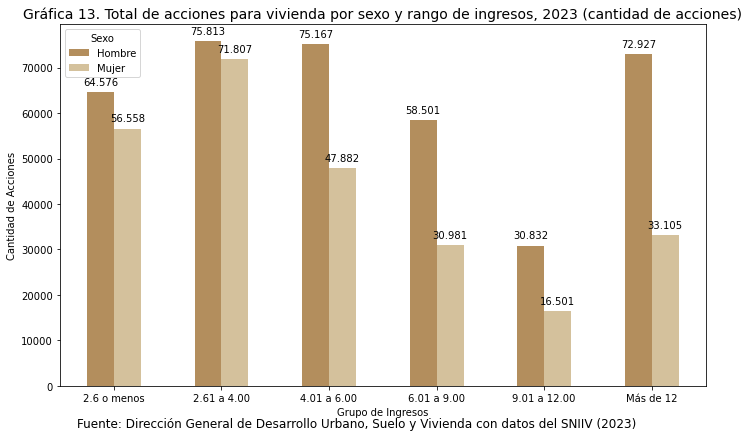

In [477]:
# Establecer el formato de localización en español
locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')

# Filtrar el DataFrame para excluir 'No disponible' en 'rango_salarial'
df_nd = df2[(df2['rango_salarial'] != 'No disponible') & (df2['sexo'] != 'No disponible')]

total_financiamientos = df_nd.groupby(['rango_salarial', 'sexo'])['acciones'].sum()

# Reorganizar los datos para tener 'rango_salarial' como barras y separados por 'sexo'
total_financiamientos = total_financiamientos.unstack()

# Definir colores personalizados para los sexos
colors = {'Hombre': '#b38e5d', 'Mujer': '#d4c19c'}

# Crear un gráfico de barras con colores personalizados
ax = total_financiamientos.plot(kind='bar', figsize=(10, 6), color=[colors[col] for col in total_financiamientos.columns])

# Añadir cantidad de acciones a cada barra
for p in ax.patches:
    ax.annotate(locale.format_string('%d', p.get_height(), grouping=True), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Añadir etiquetas y título
plt.title('Gráfica 13. Total de acciones para vivienda por sexo y rango de ingresos, 2023 (cantidad de acciones)',horizontalalignment='center', fontsize=14)
plt.xlabel('Grupo de Ingresos')
plt.ylabel('Cantidad de Acciones')
plt.xticks(rotation=0, ha='center')
plt.figtext(0.5, 0.002, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)', horizontalalignment='center', fontsize=12)

# Mostrar el gráfico
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

## Financiamientos para vivienda por entidad federativa	
- Tabla 1. Total de acciones de vivienda otorgadas por mes, 2023(monto)


In [487]:
# Leer datos de la solicitud desde un archivo CSV en línea
data = pd.read_csv("https://raw.githubusercontent.com/coordanalisis-sedatu/datavivi/main/solicitud.csv")

# Construir clavegeostadística
# Agregar cero a entidad
data['cve_ent'] = data['cve_ent'].apply(lambda x: "0" + str(x) if len(str(x)) == 1 else str(x))

# Agregar ceros a municipio
data['cve_mun'] = data['cve_mun'].apply(lambda x: "00" + str(x) if len(str(x)) == 1 else ("0" + str(x) if len(str(x)) == 2 else str(x)))

# Crear clave geoestadística
data['cvegeo'] = data['cve_ent'] + data['cve_mun']

# Mapear códigos de entidad a nombres de estado
state_mapping = {
    "01": "Aguascalientes",
    "02": "Baja California",
    "03": "Baja California Sur",
    "04": "Campeche",
    "05": "Coahuila de Zaragoza",
    "06": "Colima",
    "07": "Chiapas",
    "08": "Chihuahua",
    "09": "Ciudad de México",
    "10": "Durango",
    "11": "Guanajuato",
    "12": "Guerrero",
    "13": "Hidalgo",
    "14": "Jalisco",
    "15": "México",
    "16": "Michoacán de Ocampo",
    "17": "Morelos",
    "18": "Nayarit",
    "19": "Nuevo León",
    "20": "Oaxaca",
    "21": "Puebla",
    "22": "Querétaro",
    "23": "Quintana Roo",
    "24": "San Luis Potosí",
    "25": "Sinaloa",
    "26": "Sonora",
    "27": "Tabasco",
    "28": "Tamaulipas",
    "29": "Tlaxcala",
    "30": "Veracruz de Ignacio de la Llave",
    "31": "Yucatán",
    "32": "Zacatecas"
}

# Aplicar mapeo para crear columna 'estado'
data['estado'] = data['cve_ent'].map(state_mapping)
data


,año,organismo,cve_ent,cve_mun,destino,nivel_salarial,sexo,edad,creditos,monto,cvegeo,estado
0,2013,CONAVI,01,001,Mejoramientos,2.61 a 4.00,Hombre,30 a 59,2,22400.00,01001,Aguascalientes
1,2013,CONAVI,01,001,Mejoramientos,2.61 a 4.00,Mujer,29 o menos,1,4800.00,01001,Aguascalientes
2,2013,CONAVI,01,001,Mejoramientos,2.61 a 4.00,Mujer,30 a 59,2,22400.00,01001,Aguascalientes
3,2013,CONAVI,01,001,Mejoramientos,2.6 o menos,Hombre,30 a 59,1,6000.00,01001,Aguascalientes
4,2013,CONAVI,01,001,Mejoramientos,2.6 o menos,Mujer,30 a 59,1,6000.00,01001,Aguascalientes
...,...,...,...,...,...,...,...,...,...,...,...,...
665189,2024,SHF (FONDEO),32,017,Mejoramientos,No disponible,Mujer,29 o menos,4,0.00,32017,Zacatecas
665190,2024,SHF (FONDEO),32,024,Mejoramientos,No disponible,Hombre,29 o menos,1,0.00,32024,Zacatecas
665191,2024,SHF (FONDEO),32,032,Mejoramientos,No disponible,Hombre,29 o menos,1,0.00,32032,Zacatecas
665192,2024,SHF (FONDEO),32,050,Mejoramientos,No disponible,Mujer,29 o menos,1,0.00,32050,Zacatecas


In [425]:
# Obtención de los datos por sexo y rangos de edad de financiamientos de vivienda
url3="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2022,2023/00/0/anio,mes"
r=requests.get(url3)
print(r.status_code)

200


df3=pd.DataFrame(r.json())
df3

 - Tabla 2 Total de acciones de vivienda otorgadas por mes, 2023 (acciones)

- Figura 1. Cantidad de acciones de financiamiento de vivienda anual 2023, por entidad federativa.

- Tabla 3. Entidades federativas con mayor y menor cantidad de acciones de financiamiento de vivienda anual 2023. 

- Figura 2. Variación porcentual de acciones de financiamiento de vivienda anual 2023.

- Tabla 4. Entidades federativas con mayor y menor variación en acciones de financiamiento de vivienda anual 2023.

- Figura 3. Monto total de financiamientos de vivienda anual, 2023 por entidad federativa (miles de millones de pesos)

- Tabla 5. Entidades federativas con mayor y menor monto de financiamiento individual de vivienda anual 2023.


- Figura 4. Monto promedio de financiamiento individual de vivienda anual 2023, por entidad federativa (pesos)

- Tabla 6. Entidades federativas con mayor y menor monto promedio de financiamiento individual de vivienda anual 2023.

- Figura 5. Variación porcentual del monto de financiamiento de vivienda anual, por entidad federativa.

- Tabla 7. Entidades federativas con mayor y menor variación porcentual en el monto total de financiamiento de vivienda anual 2023. 

## 3) PROGRAMAS SOCIALES DEL RAMO 15 CON INFORMACIÓN DISPONIBLE EN EL SNIIV	

#### Estadísticas Generales
- Tabla 8. Tabla comparativa de los subsidios otorgados por mes 2023  (en acciones)

In [250]:
# Obtención de los datos
url_sco = "https://sniiv.sedatu.gob.mx/api/CuboAPI/GetCONAVI/2023,2023/00/0/anio,mes,programa_presupuestal"
r = requests.get(url_sco)

# Crear DataFrame a partir de los datos JSON
df_sco = pd.DataFrame(r.json())

# Mapeo de nombres de meses a números
meses_numeros = {
  'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6,
  'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
}

# Convertir la columna 'mes' de nombres de meses a números
df_sco['mes_numero'] = df_sco['mes'].str.lower().map(meses_numeros)

# Crear nueva columna de fecha utilizando 'anio' y 'mes_numero'
df_sco['fecha'] = pd.to_datetime({'year': df_sco['año'], 'month': df_sco['mes_numero'], 'day': 1})

# Eliminar las columnas 'anio', 'mes' y 'mes_numero'
df_sco.drop(['año', 'mes', 'mes_numero'], axis=1, inplace=True)

# Reordenar el DataFrame para que 'fecha' esté en la primera posición
df_sco = df_sco[['fecha'] + [col for col in df_sco.columns if col != 'fecha']]

# Ordenar el DataFrame por la columna de fecha
df_sco = df_sco.sort_values(by='fecha')

# Obtener datos de las fechas requeridas 2023-01 a 2023-12
df_sco = df_sco.loc[(df_sco['fecha'] >= '2023-01') & (df_sco['fecha'] <= '2023-12')]

In [251]:
# Crear DataFrame con pivot_table para montos
df_montos = df_sco.pivot_table(index='fecha', columns='programa_presupuestal', values='monto', aggfunc='sum')
df_montos

programa_presupuestal,Programa Nacional de Reconstrucción,Programa de Vivienda Social (Cofinanciamiento),Programa de Vivienda Social (PMV),Programa de Vivienda Social (Subsidio 100% CONAVI)
fecha,,,,
2023-01-01,NaN,3417.81,NaN,NaN
2023-02-01,240578402.06,3417.81,NaN,337737623.29
2023-03-01,180182784.31,3417.81,500135000.00,NaN
2023-04-01,79904000.00,3417.81,805000.00,458256762.81
2023-05-01,14425000.00,3417.81,206390000.00,176644275.16
2023-06-01,9801000.00,3417.81,1201145000.00,366732491.32
2023-07-01,31858677.72,3417.81,79290000.00,98149116.96
2023-08-01,1068493.36,3417.81,15925000.00,149661832.00
2023-09-01,3354739.19,3417.81,9610000.00,343290274.06


- Tabla 9. Tabla comparativa de los subsidios otorgados por mes 2023 (en pesos)

In [252]:
# Crear DataFrame con pivot_table para acciones
df_acciones = df_sco.pivot_table(index='fecha', columns='programa_presupuestal', values='acciones', aggfunc='sum')
df_acciones

programa_presupuestal,Programa Nacional de Reconstrucción,Programa de Vivienda Social (Cofinanciamiento),Programa de Vivienda Social (PMV),Programa de Vivienda Social (Subsidio 100% CONAVI)
fecha,,,,
2023-01-01,NaN,0.00,NaN,NaN
2023-02-01,1077.00,0.00,NaN,1360.00
2023-03-01,675.00,0.00,14035.00,NaN
2023-04-01,309.00,0.00,23.00,2189.00
2023-05-01,63.00,0.00,5889.00,751.00
2023-06-01,43.00,0.00,34111.00,931.00
2023-07-01,36.00,0.00,2256.00,416.00
2023-08-01,6.00,0.00,455.00,760.00
2023-09-01,7.00,0.00,273.00,1031.00


- Gráfica 14. Total de subsidios para vivienda otorgados por el ramo 15, según programa y edad, 2023 (porcentaje)

In [260]:
# Obtención de los datos
url_sco1 = "https://sniiv.sedatu.gob.mx/api/CuboAPI/GetCONAVI/2023,2023/00/0/anio,rango_edad,programa_presupuestal"
r = requests.get(url_sco1)

# Crear DataFrame a partir de los datos JSON
df_sco1 = pd.DataFrame(r.json())
df_sco1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   año                    12 non-null     int64  
 1   grupo_edad             12 non-null     object 
 2   programa_presupuestal  12 non-null     object 
 3   acciones               12 non-null     int64  
 4   monto                  12 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 612.0+ bytes


In [261]:
df_sco1

,año,grupo_edad,programa_presupuestal,acciones,monto
0,2023,29 o menos,Programa de Vivienda Social (Cofinanciamiento),224,4162165.10
1,2023,29 o menos,Programa Nacional de Reconstrucción,159,40486390.26
2,2023,29 o menos,Programa de Vivienda Social (Subsidio 100% CON...,1482,405141099.82
3,2023,29 o menos,Programa de Vivienda Social (PMV),5580,196895000.00
4,2023,30 a 59,Programa de Vivienda Social (Cofinanciamiento),862,17493027.10
5,2023,30 a 59,Programa Nacional de Reconstrucción,1284,379027612.85
6,2023,30 a 59,Programa de Vivienda Social (Subsidio 100% CON...,6275,1712608507.58
7,2023,30 a 59,Programa de Vivienda Social (PMV),35464,1249105000.00
8,2023,60 o más,Programa de Vivienda Social (Cofinanciamiento),31,1527333.88
9,2023,60 o más,Programa Nacional de Reconstrucción,897,277725834.18


- Gráfica 15. Subsidios para vivienda otorgados por el ramo 15, según programa y sexo, 2023 (porcentaje)	

In [263]:
# Obtención de los datos
url_sco2 = "https://sniiv.sedatu.gob.mx/api/CuboAPI/GetCONAVI/2023,2023/00/0/anio,genero,programa_presupuestal"
r = requests.get(url_sco2)

# Crear DataFrame a partir de los datos JSON
df_sco2 = pd.DataFrame(r.json())
df_sco2

,año,sexo,programa_presupuestal,acciones,monto
0,2023,Hombre,Programa de Vivienda Social (Cofinanciamiento),604,11608781.21
1,2023,Hombre,Programa Nacional de Reconstrucción,1071,326557911.17
2,2023,Hombre,Programa de Vivienda Social (Subsidio 100% CON...,3943,1117193650.77
3,2023,Hombre,Programa de Vivienda Social (PMV),18926,668295000.00
4,2023,Mujer,Programa de Vivienda Social (Cofinanciamiento),513,11573744.87
5,2023,Mujer,Programa Nacional de Reconstrucción,1269,370681926.12
6,2023,Mujer,Programa de Vivienda Social (Subsidio 100% CON...,6441,1753560769.81
7,2023,Mujer,Programa de Vivienda Social (PMV),38158,1346530000.00


- Gráfica 16. Total de acciones otorgadas mediante el PRAH, mensual  2023.	

In [303]:
# Obtención de los datos
url_PRAH = "https://sniiv.sedatu.gob.mx/api/CuboAPI/GetInsus/2022,2023/00/0/anio,mes,genero"
r = requests.get(url_PRAH)

# Crear DataFrame a partir de los datos JSON
df_PRAH = pd.DataFrame(r.json())

# Mapeo de nombres de meses a números
meses_numeros = {
    'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6,
    'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
}

# Convertir la columna 'mes' de nombres de meses a números
df_PRAH['mes_numero'] = df_PRAH['mes'].str.lower().map(meses_numeros)

# Crear nueva columna de fecha utilizando 'anio' y 'mes_numero'
df_PRAH['fecha'] = pd.to_datetime({'year': df_PRAH['año'], 'month': df_PRAH['mes_numero'], 'day': 1})

# Eliminar las columnas 'anio', 'mes' y 'mes_numero'
df_PRAH.drop(['año', 'mes', 'mes_numero'], axis=1, inplace=True)

# Reordenar el DataFrame para que 'fecha' esté en la primera posición
df_PRAH = df_PRAH[['fecha'] + [col for col in df_PRAH.columns if col != 'fecha']]

# Ordenar el DataFrame por la columna de fecha
df_PRAH = df_PRAH.sort_values(by='fecha')

# Obtener datos de las fechas requeridas 2023-01 a 2023-12
df_PRAH = df_PRAH.loc[(df_PRAH['fecha'] >= '2023-01') & (df_PRAH['fecha'] < '2023-12')]

# Mostrar información sobre el DataFrame
df_PRAH

,fecha,sexo,acciones,monto
41,2023-01-01,Mujer,54,729000.00
39,2023-01-01,Hombre,43,580500.00
0,2023-02-01,Mujer,94,1269000.00
18,2023-02-01,Hombre,106,1431000.00
27,2023-03-01,Hombre,139,1876500.00
9,2023-03-01,Mujer,161,2173500.00
2,2023-04-01,Hombre,126,1701000.00
44,2023-04-01,Mujer,174,2349000.00
23,2023-05-01,Mujer,273,3685500.00
46,2023-05-01,Hombre,227,3064500.00


- Gráfica 17. Monto total de apoyos otorgados mediante el PRAH mensual 2023 (en pesos)	

## 4) OFERTA DE VIVIENDA


#### Perímetros de contención urbana y valor de la vivienda	
- Gráfica 18. Registro de vivienda según su Perímetro de Contención Urbana y el valor de la vivienda 2023 (porcentaje)

In [311]:
# Obtención de los datos
url_ruv = "https://sniiv.sedatu.gob.mx/api/CuboAPI/GetInventario/2023,6/0/0/pcu,segmento"
r = requests.get(url_ruv)

# Crear DataFrame a partir de los datos JSON
df_ruv = pd.DataFrame(r.json())
df_ruv

,año,pcu,segmento,viviendas
0,0,FC,Económica,13341
1,0,U3,Económica,45963
2,0,U2,Económica,11839
3,0,U1,Económica,4356
4,0,FC,Popular,16943
5,0,U3,Popular,44397
6,0,U2,Popular,14627
7,0,U1,Popular,6761
8,0,FC,Tradicional,10009
9,0,U3,Tradicional,28248


#### Registro de Viviendas	
- Figura 6. Registro de viviendas acumuladas según entidad federativa 2023

In [287]:
# Obtención de los datos
url_ruv = "https://sniiv.sedatu.gob.mx/api/CuboAPI/GetInventario/2023,1/0/0/pcu,segmento"
r = requests.get(url_ruv)

# Crear DataFrame a partir de los datos JSON
df_ruv = pd.DataFrame(r.json())
df_ruv



,año,pcu,segmento,viviendas
0,0,FC,Económica,10269
1,0,U3,Económica,45647
2,0,U2,Económica,10537
3,0,U1,Económica,3575
4,0,FC,Popular,18826
5,0,U3,Popular,47402
6,0,U2,Popular,14302
7,0,U1,Popular,7281
8,0,FC,Tradicional,10616
9,0,U3,Tradicional,31782


- Tabla 10. Registro de viviendas acumuladas según entidad federativa 2023


#### Inventario de Vivienda
- Tabla 11. Inventario de vivienda acumulado mensual 2023 según entidad federativa


In [292]:
# Obtención de los datos
url_ruv = "https://sniiv.sedatu.gob.mx/api/CuboAPI/GetInventario/2023,1/00/0/estado,pcu"
r = requests.get(url_ruv)

# Crear DataFrame a partir de los datos JSON
df_ruv = pd.DataFrame(r.json())
df_ruv

# grafica de barras

,año,estado,pcu,viviendas
0,0,Aguascalientes,U1,310
1,0,Aguascalientes,U2,1188
2,0,Aguascalientes,U3,5193
3,0,Aguascalientes,FC,241
4,0,Baja California,U1,815
...,...,...,...,...
121,0,Yucatán,FC,1134
122,0,Zacatecas,U1,130
123,0,Zacatecas,U2,202
124,0,Zacatecas,U3,1640


- Figura 7. Inventario de vivienda acumulado según entidad federativa, mensual 2023.

In [290]:
# Obtención de los datos
url_ruv = "https://sniiv.sedatu.gob.mx/api/CuboAPI/GetInventario/2023,1/0/0/pcu"
r = requests.get(url_ruv)

# Crear DataFrame a partir de los datos JSON
df_ruv = pd.DataFrame(r.json())
df_ruv

# grafica de barras

,año,pcu,viviendas
0,0,U1,19168
1,0,U2,38204
2,0,U3,133083
3,0,FC,43189


- Tabla 12. Inventario por situación de avance (Miles de viviendas)

In [ ]:
# Obtención de los datos
url_ruv = "https://sniiv.sedatu.gob.mx/api/CuboAPI/GetInventario/2023,1/0/0/pcu,segmento"
r = requests.get(url_ruv)

# Crear DataFrame a partir de los datos JSON
df_ruv = pd.DataFrame(r.json())
df_ruv

# grafica de barras

## 5) ÍNDICE DE PRECIOS SOCIEDAD HIPOTECARIA FEDERAL 